MNIST fashion Dataset classification

# **Image Types**
- Binary (either 0 or 1)
- Grey scale (2D  0(black) to 255(white) px)       . 256 colors
- RGB (3D image, Red Green Blue each value 0 to 255) i.e 256 X 256 X 256 = 16 Million Colors

In [ ]:
#27/09/2022

In [ ]:
import tensorflow as tf
import numpy as np

fas_data = tf.keras.datasets.fashion_mnist
(train_image, train_lable),(test_image, test_lable) = fas_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#explore the dataset
print(train_image.shape)

(60000, 28, 28)


In [ ]:
#explore data
print(train_image.shape)
print(train_lable[0:20])
print(np.unique(train_lable))
print('Number of class ', len(np.unique(train_lable)))
print(test_image.shape)
print(np.unique(test_lable))

(60000, 28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
[0 1 2 3 4 5 6 7 8 9]
Number of class  10
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


(28, 28)


Text(0.5, 0, 'Dress')

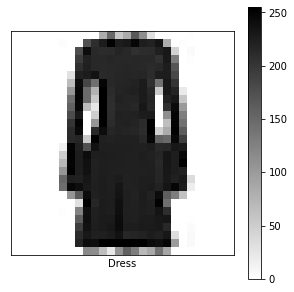

In [ ]:
#exploring an image
i = 49
print(train_image[i].shape)
class_name = ['Tshirt/Top','Trousers','Pullover','Dress','coat','sandal','shirt','sneaker','bag','ankle boot']

###################

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(train_image[i],cmap=plt.cm.binary)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_name[train_lable[i]])

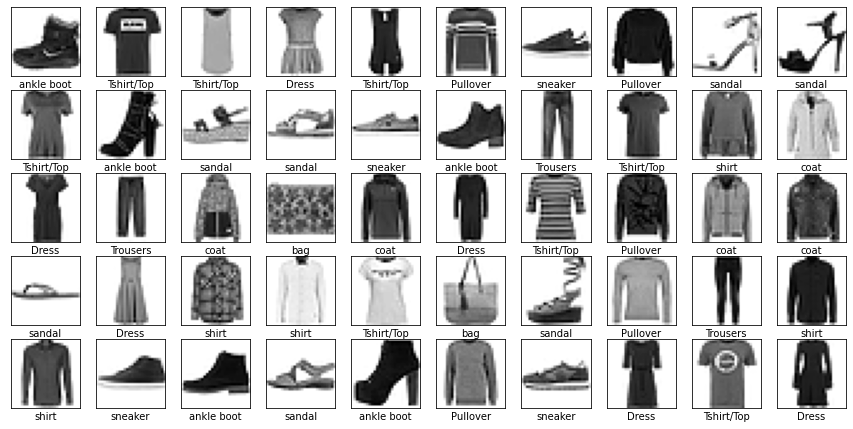

In [ ]:
# visualize first 100 image

plt.figure(figsize=(15,15))
for i in range (50):
  plt.subplot(10,10,i+1)
  plt.imshow(train_image[i],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_name[train_lable[i]])

plt.show()

In [ ]:
train_image[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [ ]:
#data preprocessing
# input data= scaling pixel values[0 -1]

train_image=train_image/255.0
test_iamge=test_image/255.0

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(train_image,train_lable,epochs=10,validation_split=0.2, batch_size=100)

Epoch 1/10
480/480 [==============================] - 4s 7ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.4738 - val_accuracy: 0.8336
Epoch 2/10
480/480 [==============================] - 4s 9ms/step - loss: 0.4631 - accuracy: 0.8380 - val_loss: 0.4667 - val_accuracy: 0.8365
Epoch 3/10
480/480 [==============================] - 5s 9ms/step - loss: 0.4445 - accuracy: 0.8458 - val_loss: 0.4402 - val_accuracy: 0.8483
Epoch 4/10
480/480 [==============================] - 4s 9ms/step - loss: 0.4329 - accuracy: 0.8483 - val_loss: 0.4658 - val_accuracy: 0.8424
Epoch 5/10
480/480 [==============================] - 4s 9ms/step - loss: 0.4277 - accuracy: 0.8497 - val_loss: 0.4355 - val_accuracy: 0.8489
Epoch 6/10
480/480 [==============================] - 5s 10ms/step - loss: 0.4187 - accuracy: 0.8541 - val_loss: 0.4455 - val_accuracy: 0.8432
Epoch 7/10
480/480 [==============================] - 3s 6ms/step - loss: 0.4156 - accuracy: 0.8532 - val_loss: 0.4339 - val_accuracy: 0.8491
Epoch

In [ ]:
model.save('my_model')

In [ ]:
test_loss, test_acc=model.evaluate(test_image,test_lable)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 129.0760 - accuracy: 0.7592
0.7591999769210815


In [ ]:
d=hist.history
d.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

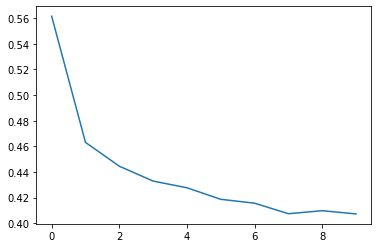

In [ ]:
plt.plot(range(10),d['loss'])



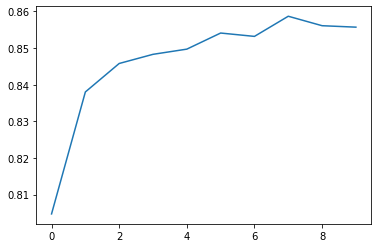

In [ ]:
plt.plot(range(10),d['accuracy'])

In [ ]:
pred = model.predict(test_image)
print(pred)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
p = np.argmax(pred, axis = 1)
print(p[0:10])
print(test_lable[0:10])

[9 2 1 1 6 1 4 4 7 7]
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(p,test_lable)
cm

array([[735,   0,   9,  22,   0,   1,  92,   0,   0,   0],
       [  6, 941,   2,  19,   0,   1,   1,   0,   0,   0],
       [ 34,  11, 639,  33,  41,   0, 116,   0,   4,   1],
       [ 23,  22,   2, 686,   1,   0,   9,   0,   2,   0],
       [ 75,  22, 292, 184, 943,   0, 427,   0,   9,   0],
       [  0,   0,   0,   0,   0, 637,   0,   5,   2,   1],
       [ 93,   2,  30,  33,   5,   0, 292,   0,   2,   0],
       [  0,   0,   1,   0,   0,  82,   0, 753,   5,   4],
       [ 33,   2,  25,  23,  10,  17,  62,   0, 973,   1],
       [  1,   0,   0,   0,   0, 262,   1, 242,   3, 993]])

In [ ]:
i=1002
class_name=['TShirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(pred[i])
print('Predicted Label ',tf.argmax(pred[i]).numpy())
print('Predicted class ',class_name[tf.argmax(pred[i]).numpy()])
print('Target Class ',class_name[test_lable[i]])
print('Probablity ',tf.reduce_max(pred[i]).numpy()*100)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Label  9
Predicted class  Ankle Boot
Target Class  Sandal
Probablity  100.0


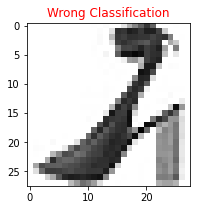

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(test_image[i],cmap=plt.cm.binary)
pc=class_name[tf.argmax(pred[i]).numpy()]
tc=class_name[test_lable[i]]
if pc==tc:
    plt.title("Correct Classification",color='g')
else:
    plt.title("Wrong Classification",color='r')

In [ ]:
# prediction of single image
i=10
img=test_image[i]
print(img.shape)
img=tf.expand_dims(img,0)
print(img.shape)
pred=model.predict(img)
print(pred[0])
print('Predicted Lable', tf.argmax(pred[0]).numpy())
print('Predicted Class ',class_name[tf.argmax(pred[0]).numpy()])
print('Probability ', tf.reduce_max(pred[0]).numpy())

(28, 28)
(1, 28, 28)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Lable 4
Predicted Class  Coat
Probability  1.0


In [ ]:
#### by default s=1       p=0

######### n*n*3                        3= red,green, blue

############## 0=floor((n+2p-m)/s)+1

##############     prevents overfitting

#########  we generally use odd dimension inorder to make a corner

########